In [3]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = 'train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [4]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


In [6]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [7]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.890 seconds.
DEBUG:jieba:Loading model cost 1.890 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=1, # Number of training epochs
                    shuffle=False,
                    batch_size=128, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5947 - loss: 0.6789 - val_accuracy: 0.7598 - val_loss: 0.6368


In [11]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7630 - loss: 0.6306

Test Loss: 0.6231
Test Accuracy: 0.7800


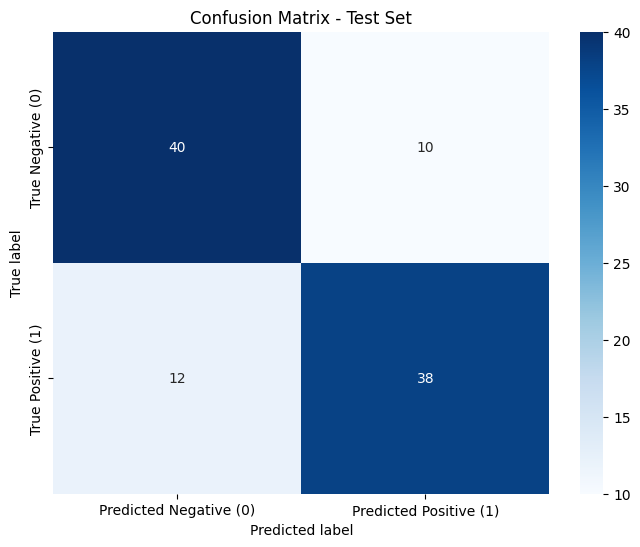

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        50
           1       0.79      0.76      0.78        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [12]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

[True Negative]
Text: 專為兒童設計AAA000一顆補足每日所需。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
True Label: 0
Pred Label: 0

[True Positive]
Text: 護眼配方000超濃視覺營養滋養黃斑部。舒緩眼壓及不適感改善眼部代謝循環。護眼產品超防護型護眼配方。
True Label: 1
Pred Label: 1

[False Negative]
Text: 對心臟和血液循環有著有益的作用是大腦視力和神經系統的必需營養素維生素AAA000是最自然和最有效的對維持健康的免疫系統和強壯的骨骼至關重要維生素AAA對支持免疫系統和視力至關重要維生素AAA是一種保護身體細胞的抗氧化劑。
True Label: 1
Pred Label: 0

[False Positive]
Text: 高達000億的活性益生菌。嚴選000種國際優勢菌種。益生菌。菊糖益生元。由內而外窈窕順暢增加自信美。不含人工香味、人工色素。
True Label: 0
Pred Label: 1

[Random]
Text: 低膽固醇、低熱量、保留營養價值多種天然堅果自然原味清新爽口鬼頭刀魚肉海苔捲超薄清脆口感營養芝麻糙米夾心健康又美味。
True Label: 0
Pred Label: 0
